## Step 01: Import pyspark and initialize Spark 

In [2]:
!pip install pyspark
# create entry points to spark
from pyspark import SparkContext, SparkConf # Spark

spark_conf = SparkConf()
# setup the name of application for SparkContext
spark_conf.setAppName("Text Analyzer")
# setup working processors for SparkContext, using all available core
spark_conf.setMaster('local[*]')

# We add this line to avoid an error : "Cannot run multiple SparkContexts at once". 
# If there is an existing spark context, we will reuse it instead of creating a new context.
sc = SparkContext.getOrCreate()

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(conf = spark_conf)

## Step 02: Create RDD and display total number of lines

In [3]:
# load both book into rdd
rdd_sh = sc.textFile("Scrum Handbook.txt")
rdd_ap = sc.textFile("Agile Processes  in Software Engineering  and Extreme Programming.txt")

# count the number of lines in each rdd
line_count_scrum = rdd_sh.count()
line_count_agile = rdd_ap.count()

# display the result
print('Total number of lines in <Scrum Handbook>: ',  line_count_scrum)
print('Total number of lines in <Agile Processess in Software Engineering and Extreme Programming>: ', line_count_agile)

Total number of lines in <Scrum Handbook>:  4617
Total number of lines in <Agile Processess in Software Engineering and Extreme Programming>:  21569


## Step 03: Cleaning/Manipulating text
### Assumption : Since this task aims for text analyzing, i assume empty line shouldn't be considered "words", thus they were cleaned at this stage

In [4]:
# import re module
import re

In [5]:
# define a function to clean the data
def text_cleaning(x):
    # get rid of non-alphabetic letter in data, but keep space for splitting later
    output_with_only_aplha_n_space = re.sub('[^a-zA-Z ]', '', x)    
    # change all uppercase letters to lowercase
    output_with_lowercase = output_with_only_aplha_n_space.lower()
    # get rid of leading and trailing spaces
    output_without_useless_spaces = output_with_lowercase.strip()  
    # return cleaned data
    return output_without_useless_spaces

In [6]:
# call text_cleaning function in map to clean the data and filter off the empty lines
rdd_sh_cleaned = rdd_sh.map(text_cleaning).filter(lambda line: len(line) > 0)
rdd_ap_cleaned = rdd_ap.map(text_cleaning).filter(lambda line: len(line) > 0)
# display the text data after cleaning
print('Cleaned data result of Scrum Handbook(first 10 records):', rdd_sh_cleaned.take(10))
print('Cleaned data result of Agile Processes(first 10 records):', rdd_ap_cleaned.take(10))

Cleaned data result of Scrum Handbook(first 10 records): ['jeff sutherlands', 'scrum handbook', 'everything', 'you need', 'to know', 'to start', 'a scrum project', 'in your', 'organization', 'scrum']
Cleaned data result of Agile Processes(first 10 records): ['lnbip', 'i helen sharp', 'tracy hall eds', 'agile processes', 'in software engineering', 'and extreme programming', 'th international conference xp', 'edinburgh uk may', 'proceedings', 'springer open']


## Step04: Transforming Data and Counting the words
### Also as previous step, empty space are not considered to be word, which are cleaned at this step.

In [7]:
# split data by space, transform into key value pair and reduce by key, also get rid of empty word in this step
rdd_sh_splitted = rdd_sh_cleaned.flatMap(lambda x : x.split(" ")).map(lambda x : (x,1)).reduceByKey(lambda a,b: a + b).filter(lambda word: len(word[0]) != 0)

# display each word and number count
print('Frequency of each word in Scrum Handbook: ', rdd_sh_splitted.collect())
print('-------------------------------------------------------------------------------------------')

# split data by space, transform into key value pair and reduce by key, also get rid of empty word in this step
rdd_ap_splitted = rdd_ap_cleaned.flatMap(lambda x : x.split(" ")).map(lambda x : (x,1)).reduceByKey(lambda a,b: a + b).filter(lambda word: len(word[0]) != 0)

# display each word and number count
print('Frequency of each word in Agile Processes: ', rdd_ap_splitted.collect())
print('-------------------------------------------------------------------------------------------')

# display the top 20 most frequent word in Scrum Handbook
rdd_sh_sorted = rdd_sh_splitted.sortBy(lambda x:x[1], ascending = False)
print('The 20 most frequent words in Scrum Handbook: ', rdd_sh_sorted.take(20))
print('-------------------------------------------------------------------------------------------')

# display the top 20 most frequent word in Agile Processes
rdd_ap_sorted = rdd_ap_splitted.sortBy(lambda x:x[1], ascending = False)
print('The 20 most frequent words in Agile Processes: ', rdd_ap_sorted.take(20))

Frequency of each word in Scrum Handbook:  [('jeff', 48), ('scrum', 395), ('everything', 6), ('know', 10), ('start', 6), ('project', 92), ('in', 360), ('training', 10), ('institute', 11), ('this', 142), ('book', 13), ('is', 348), ('dedicated', 7), ('nobel', 1), ('muhammad', 1), ('grameen', 1), ('bank', 1), ('development', 98), ('presidents', 2), ('advisory', 1), ('board', 3), ('responsible', 9), ('of', 537), ('hemisphere', 1), ('poor', 5), ('out', 19), ('model', 17), ('freeing', 1), ('developers', 23), ('caused', 3), ('management', 52), ('practices', 25), ('thanks', 1), ('include', 3), ('others', 13), ('tom', 2), ('hen', 1), ('rick', 1), ('kniberg', 2), ('bunning', 1), ('manual', 6), ('based', 12), ('papers', 6), ('published', 5), ('wwwscrumtraininginstitutecom', 2), ('own', 4), ('sutherland', 22), ('appleton', 1), ('somerville', 1), ('aaa', 1), ('executive', 1), ('an', 85), ('agile', 32), ('designed', 8), ('planning', 35), ('used', 22), ('large', 18), ('corporations', 1), ('world', 7)

Frequency of each word in Agile Processes:  [('i', 418), ('helen', 10), ('tracy', 7), ('eds', 80), ('agile', 748), ('processes', 58), ('in', 3076), ('engineering', 154), ('extreme', 29), ('programming', 79), ('xp', 146), ('may', 103), ('open', 77), ('lecture', 2), ('notes', 23), ('business', 141), ('series', 21), ('technical', 121), ('university', 109), ('john', 4), ('mylopoulos', 1), ('of', 3944), ('trento', 7), ('italy', 16), ('michael', 6), ('queensland', 1), ('technology', 81), ('brisbane', 1), ('australia', 7), ('j', 154), ('usa', 21), ('clemens', 1), ('szyperski', 1), ('microsoft', 7), ('research', 317), ('redmond', 2), ('more', 386), ('this', 915), ('at', 377), ('httpwwwspringercomseries', 1), ('department', 40), ('milton', 1), ('science', 27), ('brunei', 6), ('issn', 3), ('ebook', 2), ('library', 2), ('congress', 1), ('book', 8), ('is', 1539), ('published', 9), ('creative', 146), ('commons', 145), ('attributionnoncommercial', 21), ('httpcreativecommonsorglicensesbync', 18), ('n

The 20 most frequent words in Scrum Handbook:  [('the', 1238), ('of', 537), ('and', 534), ('to', 477), ('a', 451), ('scrum', 395), ('in', 360), ('is', 348), ('team', 260), ('product', 232), ('for', 195), ('that', 181), ('it', 165), ('on', 149), ('sprint', 146), ('this', 142), ('with', 132), ('as', 124), ('are', 119), ('by', 118)]
-------------------------------------------------------------------------------------------
The 20 most frequent words in Agile Processes:  [('the', 8145), ('and', 3965), ('of', 3944), ('to', 3714), ('in', 3076), ('a', 2701), ('is', 1539), ('that', 1355), ('for', 1194), ('as', 1028), ('on', 1015), ('we', 975), ('with', 969), ('software', 922), ('this', 915), ('are', 784), ('agile', 748), ('it', 741), ('development', 737), ('was', 711)]


## Step05: Remove stop words

In [8]:
# install nltk module
!pip3 install nltk
# import nltk module 
import nltk
# import stopwords
from nltk.corpus import stopwords
# download stopwords
nltk.download('stopwords')

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wange\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# set up filter words as stopwords from nltk
filter_words = stopwords.words('english')

# filter the unsorted RDD from last step
rdd_sh_sw_removed = rdd_sh_sorted.filter(lambda x: x[0] not in filter_words)

# count unique words
unique_sh = rdd_sh_sw_removed.count()
print("There are ", unique_sh, " unique words in <Scrum Handbook>")

# filter the unsorted RDD from last step
rdd_ap_sw_removed = rdd_ap_sorted.filter(lambda x: x[0] not in filter_words)

# count unique words
unique_ap = rdd_ap_sw_removed.count()
print("There are ", unique_ap, "unique words in <Agile Processes in Software Engineering and Extreme Programming>")

There are  2936  unique words in <Scrum Handbook>
There are  9611 unique words in <Agile Processes in Software Engineering and Extreme Programming>


## Step 06: Find average occurrence of a word

In [10]:
# use the cleaned data that without stopwords to get the total number of words 
total_sh = rdd_sh_sw_removed.collect()
no_total_sh = 0
for word in total_sh:
    no_total_sh = no_total_sh + word[1]
print("The number of total words in <Scrum Handbook> is: ", no_total_sh)
print("Thus the average occurrences of the words is: ",no_total_sh,"/",unique_sh," which is around", round(no_total_sh/unique_sh))
print('--------------------------------------')

# use the cleaned data that without stopwords to get the total number of words 
total_ap = rdd_ap_sw_removed.collect()
no_total_ap = 0
for word in total_ap:
    no_total_ap = no_total_ap + word[1]
print("The number of total words in <Agile Processess in Software Engineering and Extreme Programming> is: ", no_total_ap)
print("Thus the average occurrences of the words is: ",no_total_ap,"/",unique_ap," which is around", round(no_total_ap/unique_ap))

The number of total words in <Scrum Handbook> is:  10810
Thus the average occurrences of the words is:  10810 / 2936  which is around 4
--------------------------------------
The number of total words in <Agile Processess in Software Engineering and Extreme Programming> is:  79056
Thus the average occurrences of the words is:  79056 / 9611  which is around 8


## Step07: Visualization

In [11]:
# install matplotlib module
!pip3 install matplotlib
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
result_sh = rdd_sh_sw_removed.map(lambda x: x[1]).collect()
result_ap = rdd_ap_sw_removed.map(lambda x: x[1]).collect()

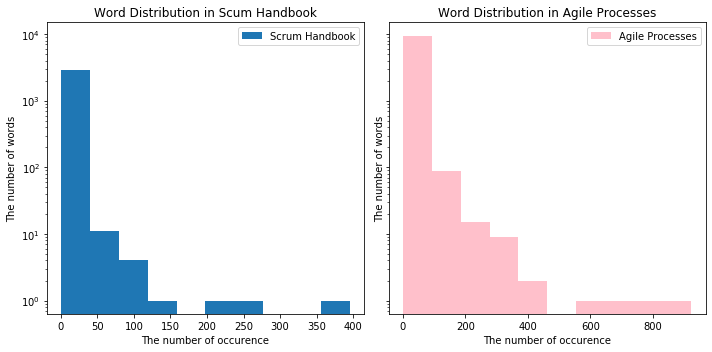

In [13]:
# set up subplots and layout
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), tight_layout=True, sharey=True)

# plot the histogram of scrum handbook
ax1.hist(result_sh, label = 'Scrum Handbook')

# set yscale to log base 10
ax1.set_yscale("log")

# set x,y label
ax1.set_xlabel('The number of occurence')
ax1.set_ylabel('The number of words')

# set up title and legend
ax1.set_title('Word Distribution in Scum Handbook')
ax1.legend(loc = 'best')

# plot the histogram of scrum handbook
ax2.hist(result_ap, color = 'pink', label = 'Agile Processes')

# set yscale to log base 10
ax2.set_yscale("log")

# set x,y label
ax2.set_xlabel('The number of occurence')
ax2.set_ylabel('The number of words')

# set up title and legend
ax2.set_title('Word Distribution in Agile Processes')
ax2.legend(loc = 'best')

# show the plot
plt.tight_layout()
plt.show()

## Explanation
### From what we can observe from the plot:
### After both datasets have been cleaned and stop words been removed, we could easily found out that In Scrum Handbook, the most common occurrence of words is between 0-50, and there are more than 1000 unique words that occurred in that range, this is basically the same case for Agile Processes in Software Engineering and Extreme Programming, where most words have an occurrence between 0-100. And we can also see that with the number of occurrences increasing, there are fewer words that were found under these frequencies.
### However, due to the fact that there are way more words in Agile Processes  than in Scrum Handbook, the number of words in Agile Processes that located in different frequency range is generally is generally higher than those in Scrum Handbook.

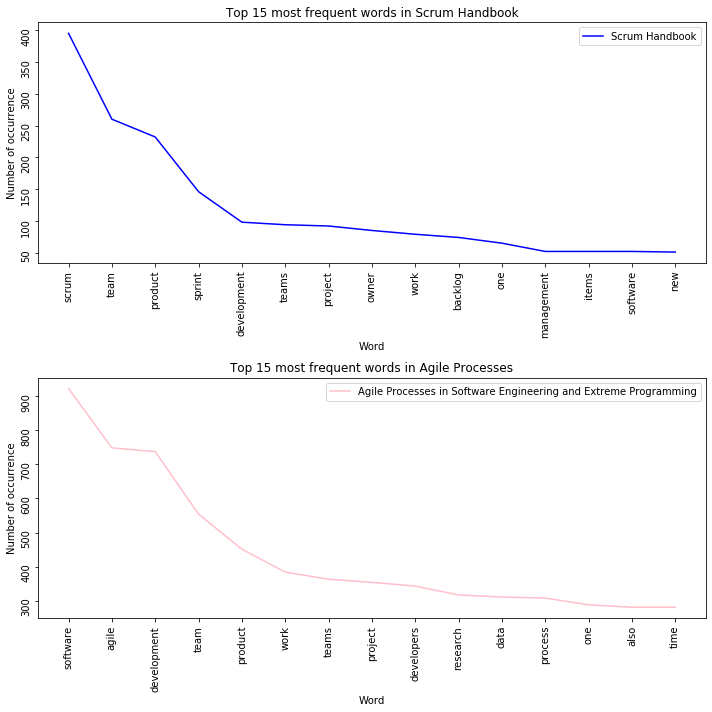

In [14]:
# set up empty list to store the x and y value of the top 15 words
x_axis_sh = []
y_axis_sh = []
x_axis_ap = []
y_axis_ap = []

# collect both rdd to lists
frequency_sh = rdd_sh_sw_removed.collect()
frequency_ap = rdd_ap_sw_removed.collect()

# set word as x, frequency as y
for i in range(15):
    x_axis_sh.append(frequency_sh[i][0])
    y_axis_sh.append(frequency_sh[i][1])
    x_axis_ap.append(frequency_ap[i][0])
    y_axis_ap.append(frequency_ap[i][1])
    
# set up figure size
fig = plt.figure(figsize=(10,10))

# set the layout of two subplots
ax_scrum = fig.add_subplot(2,1,1)
ax_agile = fig.add_subplot(2,1,2)

# draw the plot
ax_scrum.plot(x_axis_sh, y_axis_sh, label="Scrum Handbook", c = 'blue')
ax_agile.plot(x_axis_ap, y_axis_ap, label="Agile Processes in Software Engineering and Extreme Programming", c = 'pink')
ax_scrum.legend(loc = 'best')
ax_agile.legend(loc = 'best')

# set the title for both subplots
ax_scrum.set_title("Top 15 most frequent words in Scrum Handbook")
ax_agile.set_title("Top 15 most frequent words in Agile Processes")

# set up the rotation of xticks in both plot to 90 degree
ax_scrum.tick_params(labelrotation=90)
ax_agile.tick_params(labelrotation=90)

# set up the label for both axics
ax_scrum.set_xlabel('Word')
ax_scrum.set_ylabel('Number of occurrence')

ax_agile.set_xlabel('Word')
ax_agile.set_ylabel('Number of occurrence')

# set tight layout
fig.tight_layout()

## Explanation
### From what we can observe from the plot
### The most frequent 15 words in Scrum Handbook are: scrum, team, product, sprint, development, teams, project, owner, work, backlog, one, management, items, software, new
### The most frequent 15 words in Agile Processes are: software, agile, development, team, product, work, teams, project, developers, research, data, process, one, also, time
### Since both books are talking about software development, it's reasonable that some common words appear frequently in both books, such as team, product, development...
### But we can still identify the difference due to different topics of these two books, which resulted in some of the most common words like 'scrum' and 'agile'
### Also there are some general words that weren't removed as stopwords that appeared in the result, including work, new, items, one...